## Customer Advertising Dataset : Polynomial Regression 

### Hemant Thapa 

#### 1. Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#### 2. Loading Dataset

In [3]:
df = pd.read_csv('advertising.csv')

In [4]:
df[:5]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.size

800

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

#### 3. Feature Selection 

In [9]:
#feature selection
X = df['TV'].values.reshape(-1, 1)
X[:5]

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8]])

#### 4. Target Selection 

In [10]:
#target
y = df['Sales'].values
y[:5]

array([22.1, 10.4, 12. , 16.5, 17.9])

#### 5. Splitting data into train and test 

In [11]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 6. Model Selection 

In [12]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# predictions for plotting linear regression
X_train_range = np.arange(X_train.min(), 300, 1)[:, np.newaxis] 
y_linear = lr.predict(X_train_range)

In [14]:
# polynomial Regression
pr = LinearRegression()

In [15]:
quadratic = PolynomialFeatures(degree=3)
X_train_quad = quadratic.fit_transform(X_train)
X_test_quad = quadratic.transform(X_test)

In [16]:
pr.fit(X_train_quad, y_train)
y_quadratic_train = pr.predict(X_train_quad)
y_quadratic_test = pr.predict(X_test_quad)

In [17]:
# plotting polynomial regression
X_train_range_poly = quadratic.fit_transform(X_train_range)
y_quadratic_range = pr.predict(X_train_range_poly)

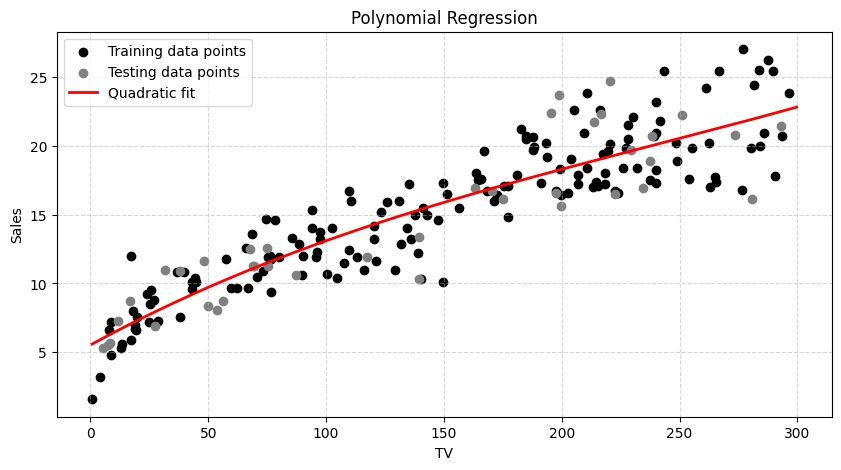

In [18]:
# plot polynomial regression results
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label="Training data points", color='black')
plt.scatter(X_test, y_test, label="Testing data points", color='grey')
plt.plot(X_train_range, y_quadratic_range, label="Quadratic fit", color='red', lw=2)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.title("Polynomial Regression")
plt.grid(True, ls='--', alpha=0.5)
plt.show()

#### 7. Model Evaluation 

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [20]:
# R-squared, MSE, RMSE, and MAE for polynomial regression
r2_poly = r2_score(y_train, y_quadratic_train)
mse_poly = mean_squared_error(y_train, y_quadratic_train)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_train, y_quadratic_train)

print("Polynomial Regression Metrics:")
print(f"R-squared: {r2_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"MAE: {mae_poly:.4f}")

Polynomial Regression Metrics:
R-squared: 0.8237
MSE: 4.7258
RMSE: 2.1739
MAE: 1.7465


#### 8. Residual Analaysis 

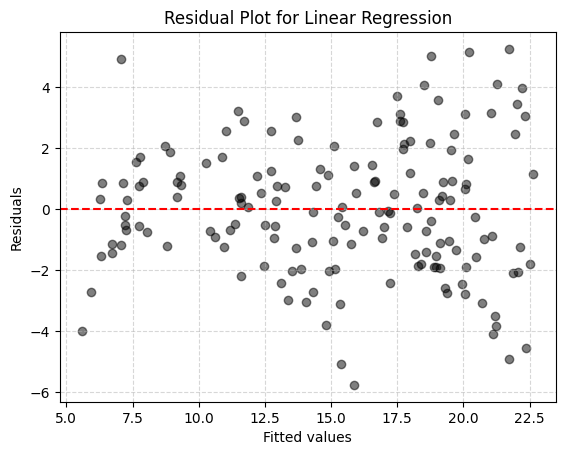

In [21]:
residuals_linear = y_train - lr.predict(X_train)
residuals_poly = y_train - y_quadratic_train
plt.scatter(y_quadratic_train, residuals_poly, color='black', alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

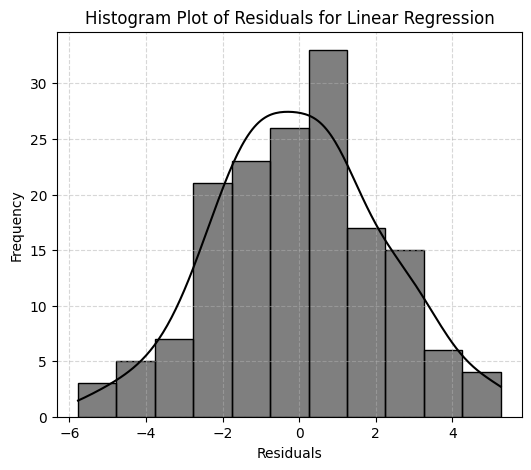

In [22]:
plt.figure(figsize=(6, 5))
sns.histplot(residuals_poly, kde=True, color='black', alpha=0.5)
plt.title('Histogram Plot of Residuals for Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

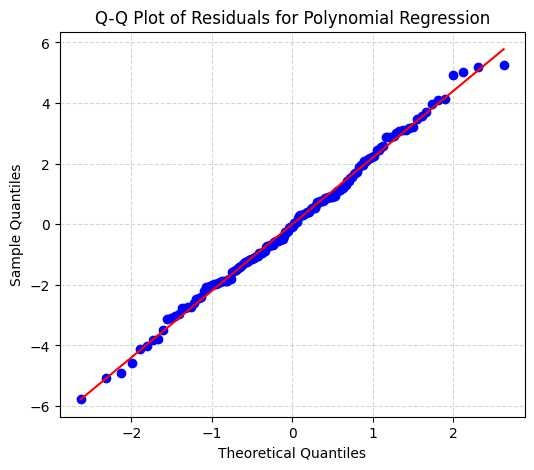

In [23]:
plt.figure(figsize=(6, 5))
stats.probplot(residuals_poly, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals for Polynomial Regression')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

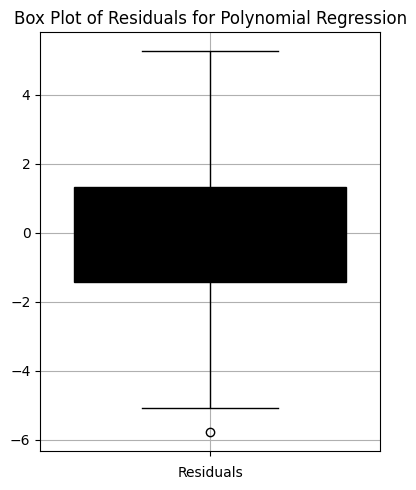

In [24]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=residuals_poly, color='black')
plt.title('Box Plot of Residuals for Polynomial Regression')
plt.xlabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

### References: 

polynomial models https://www.slideserve.com/ifama/polynomial-models

polynomial features in Scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
